In [1]:
import sys
sys.path.append("..")

In [2]:
import data_set_price.data_collect as data_collect
import yfinance

In [3]:
import util
import fusion_wrapper_price 
import numpy as np
import matplotlib.pyplot as plt

D:\anaconda\lib\site-packages\gpflow\experimental\utils.py:42: UserWarning: You're calling gpflow.experimental.check_shapes.decorator.check_shapes which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  warn(
D:\anaconda\lib\site-packages\gpflow\experimental\utils.py:42: UserWarning: You're calling gpflow.experimental.check_shapes.inheritance.inherit_check_shapes which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  warn(


In [4]:
    start_time="2007-05-01 00:00:00"
    predict_begin="2011-05-01 00:00:00"
    end_time="2015-05-01 00:00:00"

    start_time = util.convert_time_into_datetime(time=start_time)
    predict_begin = util.convert_time_into_datetime(time=predict_begin)
    end_time = util.convert_time_into_datetime(time=end_time)
    long_term_data_file = "demo_data/ex2/long/MSFT.csv"
    short_term_data_file="demo_data/ex2/short/MSFT.csv"

In [5]:
excess_time_list=range(1,25)

D:\anaconda\lib\site-packages\gpflow\experimental\utils.py:42: UserWarning: You're calling gpflow.experimental.check_shapes.checker.ShapeChecker.__init__ which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  warn(


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
excess_time: 1
averaeg error of fusion :  2.2633542474930106
average error of long_term prediction :  1.549716047855353
average error of short_term prediction :  1.800405689273728
excess_time: 2
averaeg error of fusion :  1.7623409891225517
average error of long_term prediction :  1.549716047855353
average error of short_term prediction :  1.7604206826167696
excess_time: 3
averaeg error of fusion :  2.224713001609339
average error of long_term prediction :  1.549716047855353
average error of short_term prediction :  1.7361150862422348
excess_time: 4
averaeg error of fusion :  2.209538282918915
average error of long_term prediction :  1.549716047855353
average error of short_term prediction :  1.7584477296513634
excess_time: 5
averaeg error of fusion :  2.584170370922463
average error of l

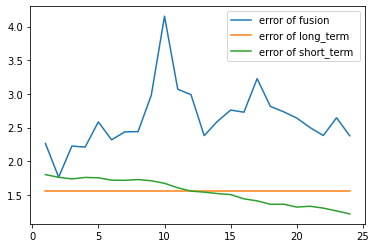

In [6]:
error_fusion_list=[]
error_long_term_list=[]
error_short_term_list=[]

for excess_time in excess_time_list:
    fff2 = fusion_wrapper_price.fusion_wrapper_price(csv_path_long_term=long_term_data_file, csv_path_short_term=short_term_data_file,GP_type="GPR")
    df_error_fusion_list, df_error_long_term_list, df_error_short_term_list, time_index = fff2.fusion_next_price_multi(start=start_time,end=end_time,fitting_windows=6,excess_time=excess_time)
    
    print("excess_time:",excess_time)
    print("averaeg error of fusion : ",np.mean(df_error_fusion_list))
    print("average error of long_term prediction : ", np.mean(df_error_long_term_list))
    print("average error of short_term prediction : ", np.mean(df_error_short_term_list))
    error_fusion_list.append(np.mean(df_error_fusion_list))
    error_long_term_list.append(np.mean(df_error_long_term_list))
    error_short_term_list.append(np.mean(df_error_short_term_list))
    
    
fig, ax = plt.subplots()

ax.plot(excess_time_list, error_fusion_list,label="error of fusion ")
ax.plot(excess_time_list, error_long_term_list, label="error of long_term ")
ax.plot(excess_time_list, error_short_term_list, label="error of short_term ")
#plt.yscale("log")
ax.legend()
plt.savefig('ex2_multi.png')
plt.show()

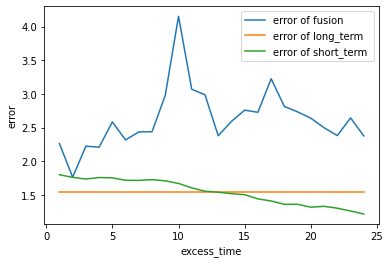

In [9]:
    
fig, ax = plt.subplots()

ax.plot(excess_time_list, error_fusion_list,label="error of fusion ")
ax.plot(excess_time_list, error_long_term_list, label="error of long_term ")
ax.plot(excess_time_list, error_short_term_list, label="error of short_term ")
ax.set_xlabel('excess_time')
ax.set_ylabel('error')
#plt.yscale("log")
ax.legend()
plt.savefig('ex2_multi.png')
plt.show()

excess_time: 1
averaeg error of fusion : 2.2633542474930106
average error of long_term prediction :  1.549716047855353
average error of short_term prediction :  1.800405689273728
excess_time: 2
averaeg error of fusion : 2.0538267435098283
average error of long_term prediction :  1.549716047855353
average error of short_term prediction :  1.7604206826167696
excess_time: 3
averaeg error of fusion : 2.0657732977142347
average error of long_term prediction :  1.549716047855353
average error of short_term prediction :  1.7361150862422348
excess_time: 4
averaeg error of fusion : 1.9380125292312358
average error of long_term prediction :  1.549716047855353
average error of short_term prediction :  1.7584477296513634
excess_time: 5
averaeg error of fusion : 2.530355976511812
average error of long_term prediction :  1.549716047855353
average error of short_term prediction :  1.7535784678809212
excess_time: 6
averaeg error of fusion : 2.107650285346243
average error of long_term prediction :  1.

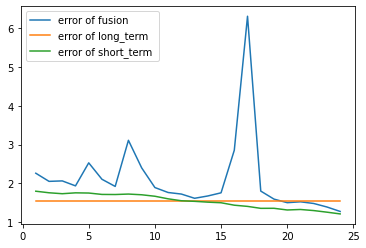

In [7]:
error_fusion_list2=[]
error_long_term_list2=[]
error_short_term_list2=[]


for excess_time in excess_time_list:
    fff2 = fusion_wrapper_price.fusion_wrapper_price(csv_path_long_term=long_term_data_file, csv_path_short_term=short_term_data_file,GP_type="GPR")
    df_error_fusion_list, df_error_long_term_list, df_error_short_term_list, time_index = fff2.multi_fusion_next_price_single_short_term_data(start=start_time,end=end_time,fitting_windows=6,excess_time=excess_time)                                                                                                                                                                                                                                                           
    print("excess_time:",excess_time)
    print("averaeg error of fusion :",np.mean(df_error_fusion_list))
    print("average error of long_term prediction : ", np.mean(df_error_long_term_list))
    print("average error of short_term prediction : ", np.mean(df_error_short_term_list))
    error_fusion_list2.append(np.mean(df_error_fusion_list))
    error_long_term_list2.append(np.mean(df_error_long_term_list))
    error_short_term_list2.append(np.mean(df_error_short_term_list))
    
    
fig, ax = plt.subplots()

ax.plot(excess_time_list, error_fusion_list2,label="error of fusion ")
ax.plot(excess_time_list, error_long_term_list2, label="error of long_term ")
ax.plot(excess_time_list, error_short_term_list2, label="error of short_term ")
#plt.yscale("log")
ax.legend()
plt.savefig('ex2_single.png')
plt.show()

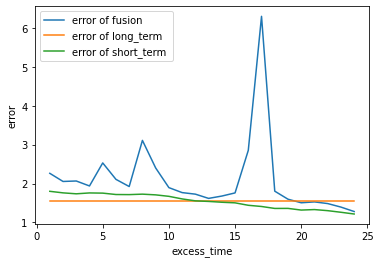

In [8]:

fig, ax = plt.subplots()

ax.plot(excess_time_list, error_fusion_list2,label="error of fusion ")
ax.plot(excess_time_list, error_long_term_list2, label="error of long_term ")
ax.plot(excess_time_list, error_short_term_list2, label="error of short_term ")
ax.set_xlabel('excess_time')
ax.set_ylabel('error')
#plt.yscale("log")
ax.legend()
plt.savefig('ex2_single.png')
plt.show()
